In [1]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np

C:\Users\nito8\AppData\Local\Temp\ipykernel_13948\1664236919.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER, period="max")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,MA,Strategy,asset_cumulative,strategy_cumulative
Date,,,,,,,,,
1993-11-11,26.199980,26.341220,26.182325,26.270600,88900,25.308220,NaN,NaN,NaN
1993-11-12,26.323574,26.411849,26.235299,26.252954,108200,25.317936,1.0,0.004717,0.004717
1993-11-15,26.305929,26.376549,26.235309,26.376549,243300,25.326696,1.0,0.004044,0.004044
1993-11-16,26.429522,26.447177,26.252972,26.358902,492600,25.335814,1.0,0.008761,0.008761
1993-11-17,26.288273,26.447168,26.217653,26.447168,39600,25.342926,1.0,0.003370,0.003370
...,...,...,...,...,...,...,...,...,...
2025-07-09,624.059998,624.719971,620.909973,622.770020,66113300,580.207185,1.0,22.819102,2.596739
2025-07-10,625.820007,626.869995,623.010010,624.200012,57529000,580.516505,1.0,22.886278,2.606882
2025-07-11,623.619995,624.859985,621.530029,622.739990,63670200,580.819700,1.0,22.802308,2.594203


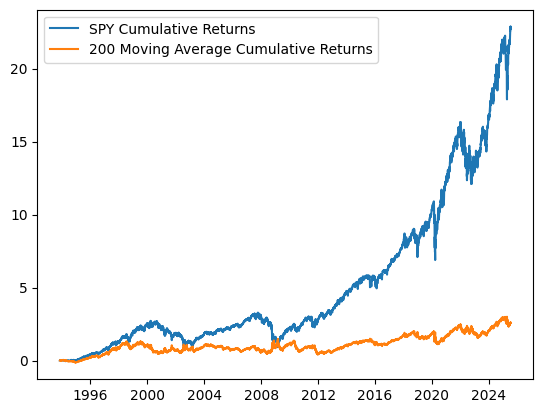

In [32]:
TICKER = 'SPY'
WINDOW = 200

def get_data():
    df = yf.download(TICKER, period="max")
    df.columns = df.columns.get_level_values(0)

    df['MA'] = df['Close'].rolling(WINDOW).mean()
    return df.dropna()

def add_strategy(df):
    df.columns = df.columns.get_level_values(0)
    df['Strategy'] = np.where(df['Close'] > df['MA'], 1, -1)
    df['Strategy'] = df['Strategy'].shift(1)
    return df

def test_strategy(df):
    df['asset_cumulative'] = np.cumprod(1 + df['Close'].pct_change()) - 1
    df['strategy_cumulative'] = np.cumprod(1 + df['Close'].pct_change() * df['Strategy']) - 1

    plt.plot(df['asset_cumulative'])
    plt.plot(df['strategy_cumulative'])
    plt.legend([f'{TICKER} Cumulative Returns', f'{WINDOW} Moving Average Cumulative Returns'])
    return df

def main():
    df = get_data()
    df = add_strategy(df)
    df = test_strategy(df)
    return df

main()

C:\Users\nito8\AppData\Local\Temp\ipykernel_21708\3978066584.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="max")
[*********************100%***********************]  1 of 1 completed


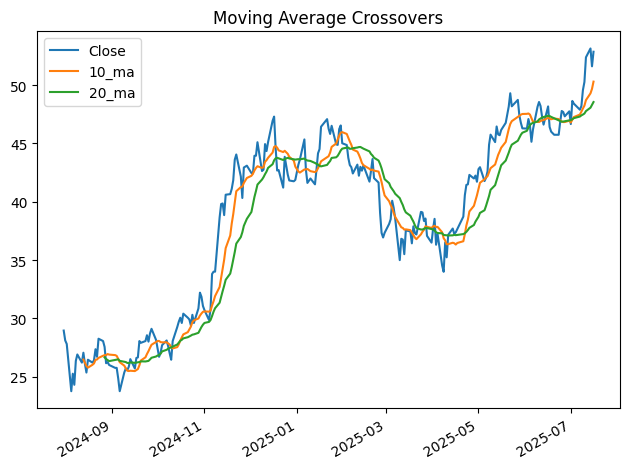

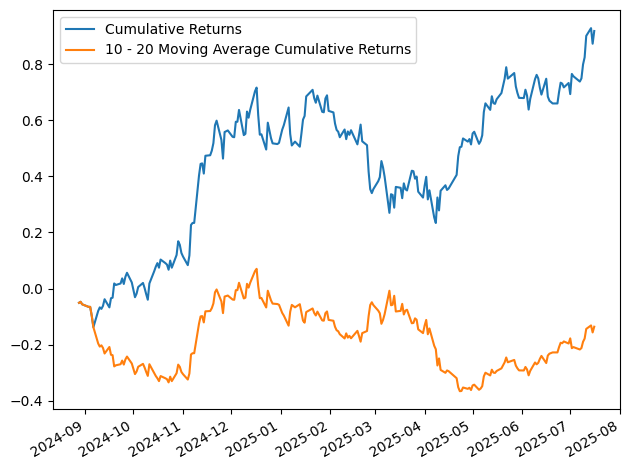

Price,Close,High,Low,Open,Volume,10_ma,20_ma,Strategy,Asset_Returns,Strategy_Returns
Date,,,,,,,,,,
2024-08-28,26.150000,26.625000,25.650000,26.600000,2540200,26.845,26.5125,1.0,-0.050817,-0.050817
2024-08-29,26.250000,27.139999,26.120001,26.700001,1416080,26.935,26.4200,1.0,-0.047187,-0.047187
2024-08-30,26.000000,26.530001,25.600000,26.400000,1655400,26.890,26.3300,1.0,-0.056261,-0.056261
2024-09-03,25.750000,26.250000,25.500000,26.200001,1079220,26.845,26.4300,1.0,-0.065336,-0.065336
2024-09-04,25.750000,25.950001,24.870001,25.049999,1206660,26.780,26.4550,1.0,-0.065336,-0.065336
...,...,...,...,...,...,...,...,...,...,...
2025-07-10,50.270000,50.494999,49.000000,49.240002,2542700,48.240,47.5610,1.0,0.824682,-0.178434
2025-07-11,52.380001,52.395000,51.689999,52.130001,1796800,48.709,47.7695,1.0,0.901271,-0.143950
2025-07-14,53.139999,54.119999,52.820000,53.930000,1475700,49.291,48.0615,1.0,0.928857,-0.131529


In [ ]:
TICKER = 'BTC'
FAST = 10
SLOW = 20
LOOKBACK = 1000

def get_data(ticker = TICKER, lookback = LOOKBACK):
    df = yf.download(ticker, period="max")
    df.columns = df.columns.get_level_values(0)
    return df.iloc[-lookback:, :]

def add_moving_averages(df, fast=FAST, slow=SLOW):
    df[f'{fast}_ma'] = df['Close'].rolling(fast).mean()
    df[f'{slow}_ma'] = df['Close'].rolling(slow).mean()

    plt.plot(df['Close'], label='Close')
    plt.plot(df[f'{fast}_ma'], label=f'{fast}_ma')
    plt.plot(df[f'{slow}_ma'], label=f'{slow}_ma')
    plt.legend()
    plt.title('Moving Average Crossovers')
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    plt.show()
    return df.dropna()

def add_strategy(df, fast=FAST, slow=SLOW):
    df['Strategy'] = np.where(df[f'{fast}_ma'] > df[f'{slow}_ma'], 1, -1)
    df['Strategy'] = df['Strategy'].shift(1)
    return df

def test_strategy(df, fast=FAST, slow=SLOW):
    df['Asset_Returns'] = (1 + df['Close'].pct_change()).cumprod() - 1
    df['Strategy_Returns'] = (1 + df['Close'].pct_change() * df['Strategy']).cumprod() - 1

    plt.figure()
    plt.plot(df['Asset_Returns'], label='Cumulative Returns')
    plt.plot(df['Strategy_Returns'], label=f'{fast} - {slow} Moving Average Cumulative Returns')
    plt.legend()
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    plt.show()
    return df.dropna()

def main():
    df = get_data()
    df = add_moving_averages(df)
    df = add_strategy(df)
    df = test_strategy(df)
    return df

main()

C:\Users\nito8\AppData\Local\Temp\ipykernel_18924\1256946776.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download([ticker, cash_ticker], period="max")['Close'].ffill()
[*********************100%***********************]  2 of 2 completed


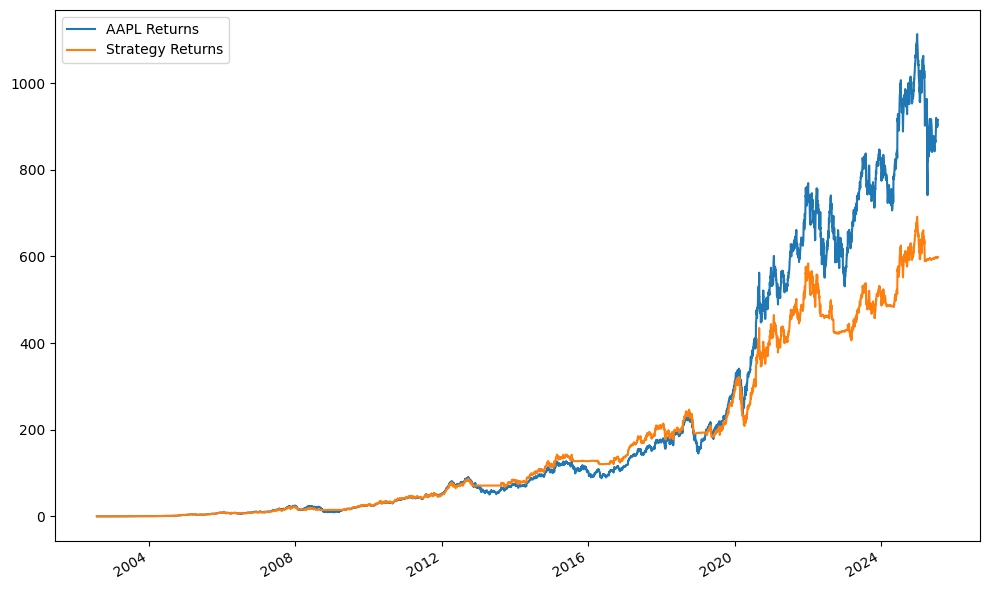

Ticker,AAPL,SHY,200_ma,Strategy,Asset_Returns,Strategy_Returns
Date,,,,,,
2002-07-30,0.231868,53.068935,0.324517,0.0,0.000000,0.000000
2002-07-31,0.229314,53.232700,0.324310,0.0,-0.011018,0.003086
2002-08-01,0.222401,53.337582,0.324071,0.0,-0.040829,0.005062
2002-08-02,0.217142,53.442318,0.323803,0.0,-0.063512,0.007036
2002-08-05,0.210229,53.527519,0.323578,0.0,-0.093327,0.008641
...,...,...,...,...,...,...
2025-07-15,209.110001,82.379997,222.233988,0.0,900.848292,597.139144
2025-07-16,210.160004,82.489998,222.156903,0.0,905.376739,597.937829
2025-07-17,210.020004,82.459999,222.073387,0.0,904.772950,597.720016


In [9]:
WINDOW = 200
LOOKBACK = 10000
TICKER = 'AAPL'
CASH_TICKER = 'SHY'

def get_data(ticker = TICKER, cash_ticker=CASH_TICKER, lookback = LOOKBACK):
    df = yf.download([ticker, cash_ticker], period="max")['Close'].ffill()
    df.columns = df.columns.get_level_values(0)
    return df.iloc[-lookback:, :]

def add_moving_average(df, ticker=TICKER, window=WINDOW):
    df[f'{window}_ma'] = df[ticker].rolling(window).mean()

    return df.dropna()

def add_strategy(df, ticker=TICKER, window=WINDOW):
    df['Strategy'] = np.where(df[ticker] > df[f'{window}_ma'], 1, 0)
    df['Strategy'] = df['Strategy'].shift(1).fillna(0)
    return df

def test_strategy(df, ticker=TICKER, cash_ticker=CASH_TICKER):
    asset_ret = df[ticker].pct_change().fillna(0)
    cash_ret  = df[cash_ticker].pct_change().fillna(0)

    strat_daily = np.where(
        df['Strategy'] == 0,
        cash_ret,
        df['Strategy'] * asset_ret
    )

    df['Asset_Returns']    = (1 + asset_ret).cumprod() - 1
    df['Strategy_Returns'] = (1 + strat_daily).cumprod() - 1

    plt.figure(figsize=(10, 6))
    plt.plot(df['Asset_Returns'],    label=f"{ticker} Returns")
    plt.plot(df['Strategy_Returns'], label="Strategy Returns")
    plt.legend()
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    plt.show()

    return df.dropna()

def main():
    df = get_data()
    df = add_moving_average(df)
    df = add_strategy(df)
    df = test_strategy(df)
    return df

main()